# Sentiment Analysis Of Tweets

In [13]:
# conda install twython
from twython import Twython

In [14]:
# https://apps.twitter.com/
consumer_key = 'oFNYu2QOp1UbUArIei9jiRQCT'
consumer_secret = 'NDjBgUPnoCXBCfnQD2CdUAq9VnIB85SMlPB8jledp47pyMbOAw'
access_token = '841034064-MVx5Gq9S5HlSzkUYlSmZRO8IGH3vuAsb0Y7VTAK0'
access_token_secret = '9QBefJ6lpcPaumJt8v2XV5RIPqvDiib8oRd3d3xueBnND'

In [15]:
twitter = Twython(consumer_key, consumer_secret,
                         access_token, access_token_secret)

In [16]:
result_dict = twitter.search(q='FIFA', lang = 'en', count=2,result_type='popular')
print(result_dict)

{'statuses': [{'created_at': 'Sat Jun 30 22:20:58 +0000 2018', 'id': 1013185651360108556, 'id_str': '1013185651360108556', 'text': "🌟🇦🇷🚫\n🌟🇵🇹⛔️\n\nTwo of football's biggest ever stars depart the #WorldCup on the same day as #ARG &amp; #POR are eliminated… https://t.co/Pxsxp5nsmn", 'truncated': True, 'entities': {'hashtags': [{'text': 'WorldCup', 'indices': [60, 69]}, {'text': 'ARG', 'indices': [89, 93]}, {'text': 'POR', 'indices': [100, 104]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Pxsxp5nsmn', 'expanded_url': 'https://twitter.com/i/web/status/1013185651360108556', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1383

In [17]:
list_tweets = result_dict['statuses']
for tweet in list_tweets:
    print (tweet['text'])
    print('#############################################')

🌟🇦🇷🚫
🌟🇵🇹⛔️

Two of football's biggest ever stars depart the #WorldCup on the same day as #ARG &amp; #POR are eliminated… https://t.co/Pxsxp5nsmn
#############################################
Mbappé becomes the first teenager to score in multiple FIFA World Cup games since Michael Owen in 1998. https://t.co/l9pMW9faV2
#############################################


# Twitter to MongoDB using Python

In [4]:
# from twython import Twython
# import pymongo

In [28]:
result_dict = twitter.search(q='FIFA', lang = 'en', count=5,result_type='popular')
list_tweets = result_dict['statuses']
for tweet in list_tweets:
    print (tweet['text'])
    print('#############################################')

🌟🇦🇷🚫
🌟🇵🇹⛔️

Two of football's biggest ever stars depart the #WorldCup on the same day as #ARG &amp; #POR are eliminated… https://t.co/Pxsxp5nsmn
#############################################
Mbappé becomes the first teenager to score in multiple FIFA World Cup games since Michael Owen in 1998. https://t.co/l9pMW9faV2
#############################################
#EAPRIZEDRAW RT for the chance to win a signed Ronaldo shirt as part of our #WorldCup National Team Shirt giveaways… https://t.co/DWv5uD4hRK
#############################################
On this day in 2002, #BRA won their FIFTH FIFA #WorldCup with a 2-0 victory over Germany! 

More stats and facts fo… https://t.co/bS5KAS1xHT
#############################################
No one is safe in the FIFA World Cup group chat 😂 https://t.co/oElT3RgWKU
#############################################


In [29]:
connection = pymongo.MongoClient()

mydb=connection.twitter
db_tweets = mydb.tweets

In [30]:
db_tweets.insert_many(list_tweets)

In [31]:
# Select from collection
records_all = db_tweets.find()

for record in records_all:
    print (record['text'])
    print(record['entities'])
    print(record['created_at'])
    print('###########################################')

🌟🇦🇷🚫
🌟🇵🇹⛔️

Two of football's biggest ever stars depart the #WorldCup on the same day as #ARG &amp; #POR are eliminated… https://t.co/Pxsxp5nsmn
{'hashtags': [{'text': 'WorldCup', 'indices': [60, 69]}, {'text': 'ARG', 'indices': [89, 93]}, {'text': 'POR', 'indices': [100, 104]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Pxsxp5nsmn', 'expanded_url': 'https://twitter.com/i/web/status/1013185651360108556', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}
Sat Jun 30 22:20:58 +0000 2018
###########################################
Mbappé becomes the first teenager to score in multiple FIFA World Cup games since Michael Owen in 1998. https://t.co/l9pMW9faV2
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1013080502209675264, 'id_str': '1013080502209675264', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/Dg8vWWcVAAAqsjp.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Dg8vWWcVAAAqsjp.jpg', '

# Sentiment Analysis

In [33]:
import re
# conda install -c conda-forge textblob
from textblob import TextBlob

In [35]:
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()))

In [39]:
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [42]:
# Select from collection
records_all = db_tweets.find()
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for record in records_all:
    tweet_raw = record['text']
    sentiment = get_tweet_sentiment(tweet_raw)
    print (sentiment,'===>',record['text'])
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
    print('###########################################')
print(sentimets_total)

neutral ===> 🌟🇦🇷🚫
🌟🇵🇹⛔️

Two of football's biggest ever stars depart the #WorldCup on the same day as #ARG &amp; #POR are eliminated… https://t.co/Pxsxp5nsmn
###########################################
positive ===> Mbappé becomes the first teenager to score in multiple FIFA World Cup games since Michael Owen in 1998. https://t.co/l9pMW9faV2
###########################################
positive ===> #EAPRIZEDRAW RT for the chance to win a signed Ronaldo shirt as part of our #WorldCup National Team Shirt giveaways… https://t.co/DWv5uD4hRK
###########################################
positive ===> On this day in 2002, #BRA won their FIFTH FIFA #WorldCup with a 2-0 victory over Germany! 

More stats and facts fo… https://t.co/bS5KAS1xHT
###########################################
positive ===> No one is safe in the FIFA World Cup group chat 😂 https://t.co/oElT3RgWKU
###########################################
{'neutral': 1, 'positive': 4, 'negative': 0}


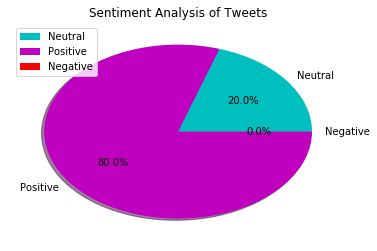

In [45]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Tweets')
plt.legend()
plt.show()